Complete documentation: https://osf.io/4rd8g/
# **GEOET - Priestley-Taylor**
    - Author Concetta D'Amato, Niccolò Tubini, Michele Bottazzi and Riccardo Rigon 
    - Licence Creative Commons 4.0

| Method's input | Temp | ShortWave | LongWave | Net Radiation | Wind speed | Humidity | Soil flux | Pressure | Leaf area index | Water content |
| --- | --- | --- | --- | --- | --- | --- | --- | ---  | --- | --- |
| Priestley-Taylor | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $     \checkmark$  | $\times$ | $\times$ |
| Penman-Monteith FAO | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$  | $\times$ | $\checkmark$ |
| Prospero | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$  | $\checkmark$ | $\checkmark$ |

### **Component Description**
The GEOET component offers the Priestley Taylor formulations for the evapotraspiration modeling:

\begin{equation}
ET_{0}^{PT} = \alpha\dfrac{\Delta\cdot (R_{n} - G)}{\Delta+\gamma}
\end{equation}
With:
\begin{equation}
 G =  \begin{cases}
   G_{morn}\cdot R_{n} \quad daylight\\G_{night}\cdot R_{n} \quad nighttime
   \end{cases} 
\end{equation}
where:
- $ET_{0}$ or $ET$ are expressed in [$mm \cdot day^{−1}$] or [$mm\cdot hour^{−1}$]; 
- $R_{n}$ is the net radiation expressed in [$MJ \cdot m^{2} \cdot day^{−1}$] or [$MJ \cdot m^{2}\cdot h^{−1}$]; 
- $G$ is the soil heat flux at the soil surface in [$MJ \cdot m^{2} \cdot day^{−1}$] or [$MJ \cdot m^{2}\cdot h^{−1}$]; 
- $\Delta$ is the slope of the saturation vapor-pressure curve expressed in ($kP_{a}\dot °C^{−1}$); 
- $\gamma$ is the psychometric constant expressed in ($kP_{a} \cdot$ °$C^{−1}$); 

### **Detailed Inputs description**
General description
The input file is a .csv file containing a header and one or more time series of input data,
depending on the number of stations involved. Each column of the file is associated to a
different station.
The file must have the following header:
- The first 3 rows with general information such as the date of the creation of the file and the author;
- The fourth and fifth rows contain the IDs of the stations (e.g. station number 8:value 8, ID, ,8);
- The sixth row contains the information about the type of the input data (in thiscase, one column with the date and one column with double values);
- The seventh row specifies the date format (YYYY-MM-dd HH:mm).


- #### **Net radiation**
The net radiation is given in time series of ($W/m^{2}$) values. The conversion from ($W/m^{2}$) to ($MJ\cdot m^{2}$) is automatically done by the component.
- #### $G_{morn}$
$G_{morn}$ is the coefficient for the soil heat flux during daylight
- #### **$G_{night}$**
$G_{night}$ is the coefficient for the soil heat flux during nighttime
- #### **doHourly**
doHourly is a boolean field to set the time step of the simulation (”true” is hourly time step, ”false” is daily).
- #### **Start Date**
Start Date is a string containing the first day of the simulation.
- #### **$\alpha$**
Parameter of the Priestley-Taylor equation (1972). The mean value is 1.26. Adimensional


### **Detailed Outputs description**
The output file will have exactly the same heading of the input file. 
- #### **Time series of the latent heat (W/m$^{2}$)**
The simulated output evapotranspiration is given as a time series at a given point. Its units are ($mm \cdot h^{−1}$) or ($mm \cdot day^{−1}$) depending on the temporal resolution chosen by the end-user.
- #### **Time series of the evapotranspiration (mm)**
The simulated output evapotranspiration is given as a time series at a given point. Its units are ($mm \cdot h^{−1}$) or ($mm \cdot day^{−1}$) depending on the temporal resolution chosen by the end-user.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.express as px
import os
import plotly.graph_objects as go

In [2]:
oms_project_path = os.path.dirname(os.getcwd())
os.chdir(oms_project_path+'/output/Cavone/1')
os.listdir()

['.DS_Store',
 'ActualEvapoTranspiration_FAO_1.csv',
 'ActualEvapotranspiration_PT_1.csv',
 'ActualLatentHeat_FAO_1.csv',
 'ActualLatentHeat_PT_1.csv',
 'canopy_1_environmentalstress.csv',
 'canopy_1_potential.csv',
 'canopy_1_totalstress.csv',
 'canopy_1_waterstress.csv',
 'CI_EvapoTranspiration_FAO_1.csv',
 'CI_LatentHeat_FAO_1.csv',
 'EnvironmentalEvapoTranspiration_FAO_1.csv',
 'EnvironmentalLatentHeat_FAO_1.csv',
 'Evaporation_1_environmentalstress.csv',
 'Evaporation_1_potential.csv',
 'Evaporation_1_totalstress.csv',
 'Evaporation_1_waterstress.csv',
 'Evaporation_FAO_1.csv',
 'EvapoTranspiration_1_environmentalstress.csv',
 'EvapoTranspiration_1_potential.csv',
 'EvapoTranspiration_1_totalstress.csv',
 'EvapoTranspiration_1_waterstress.csv',
 'Evapotranspiration_FAO_1.csv',
 'Evapotranspiration_PT_1.csv',
 'FluxEvaporation_1_environmentalstress.csv',
 'FluxEvaporation_1_potential.csv',
 'FluxEvaporation_1_totalstress.csv',
 'FluxEvaporation_1_waterstress.csv',
 'FluxEvaporation

## Read the Priestley-Taylor output

In [11]:
df = pd.read_csv('Evapotranspiration_PT_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df.columns = ['Datetime','EvapoTranspiration']
fig = px.line(df, x='Datetime', y='EvapoTranspiration', title='EvapoTranspiration Priestley-Taylor')
fig.update_traces(line_color='green')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

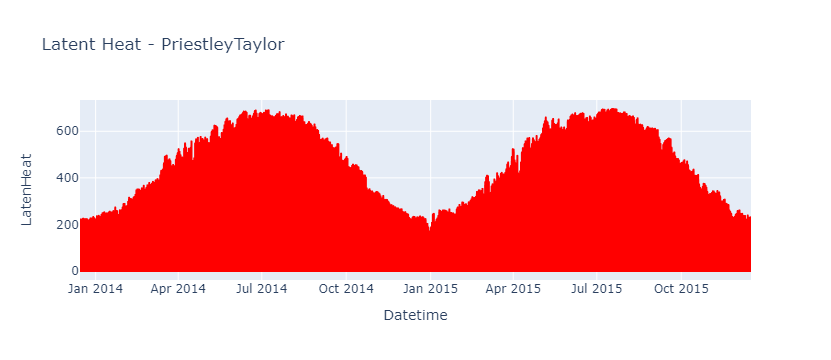

In [4]:
df2 = pd.read_csv('LatentHeat_PT_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df2.columns = ['Datetime','LatenHeat']
fig = px.line(df2, x='Datetime', y='LatenHeat', title='Latent Heat - PriestleyTaylor')
fig.update_traces(line_color='red')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

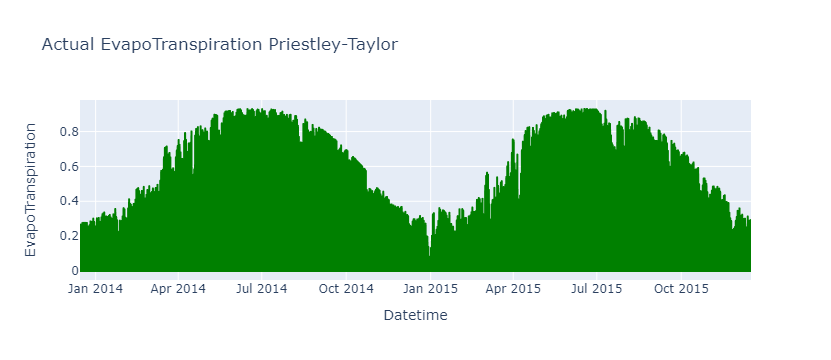

In [5]:
df3 = pd.read_csv('ActualEvapotranspiration_PT_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df3.columns = ['Datetime','EvapoTranspiration']
fig = px.line(df3, x='Datetime', y='EvapoTranspiration', title='Actual EvapoTranspiration Priestley-Taylor')
fig.update_traces(line_color='green')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

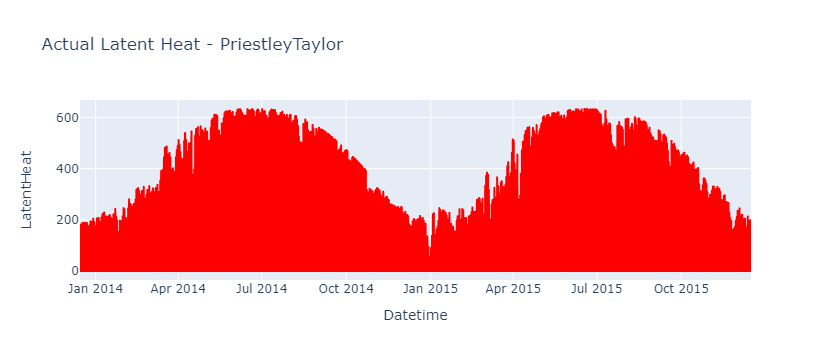

In [6]:
df4 = pd.read_csv('ActualLatentHeat_PT_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df4.columns = ['Datetime','LatentHeat']
fig = px.line(df4, x='Datetime', y='LatentHeat', title='Actual Latent Heat - PriestleyTaylor')
fig.update_traces(line_color='red')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

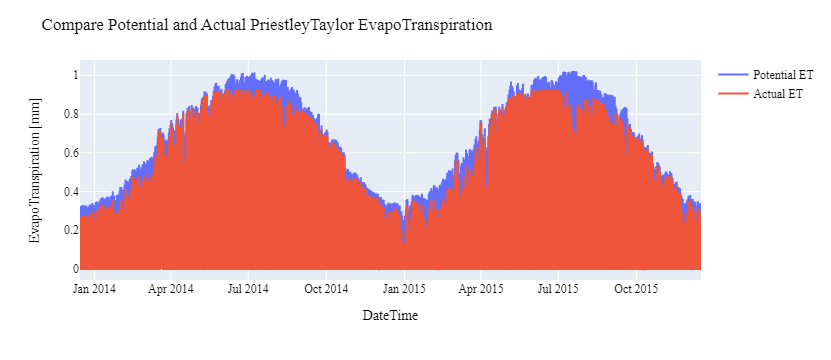

In [8]:
fig = px.line()
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['EvapoTranspiration'], mode='lines', name='Potential ET'))
fig.add_trace(go.Scatter(x=df3['Datetime'], y=df3['EvapoTranspiration'], mode='lines', name='Actual ET'))

fig.update_layout(
    title='Compare Potential and Actual PriestleyTaylor EvapoTranspiration ',
    xaxis_title="DateTime",
    font_family="Times New Roman",
    font_color="Black",
    title_font_family="Times New Roman",
    title_font_color="Black",
    yaxis_title="EvapoTranspiration [mm]",
    #legend_title="Date",
    font=dict(size=12))
fig.show()

In [9]:
show_stress('Evapotranspiration_PT_1.csv',
            'EnvironmentalEvapotranspiration_PT_1.csv',
            'WaterStressEvapotranspiration_PT_1.csv',
            'TotalEvapotranspiration_PT_1.csv')

NameError: name 'show_stress' is not defined